Text(0.5, 1.0, 'Image Label: 0')

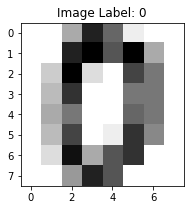

In [35]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

sample_idx = 0

plt.figure(figsize=(3,3))
plt.imshow(digits.images[sample_idx], cmap=plt.cm.gray_r,
          interpolation='nearest')

plt.title(f"Image Label: {digits.target[sample_idx]}")

In [36]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.15,
                                                   random_state=37)
# We put a random state to have reproducible results

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train) # Center and normalize
X_test = scaler.fit_transform(X_test)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1527, 64), (1527,)), ((270, 64), (270,)))

In [37]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers

In [38]:
def format_activations(layers, activations):
    # We should and always have n - 1 elts in activations if layers has n
    l = []
    i = 0
    while (i < len(layers) - 2):
        if (i < len(activations) - 1):
            l.append(activations[i])
        else: # We consider that the last layer should be kept for the last
            l.append(activations[len(activations) - 2])
        i += 1
    l.append(activations[len(activations) - 1])
    return l

In [93]:
class L_Layer_Model:
    def __init__(self, l, activations):
        activations = format_activations(l, activations)
        self.model = tf.keras.Sequential()
        for i in range(1, len(l)):
            self.model.add(layers.Dense(l[i], input_dim=l[i - 1], activation=activations[i -1]))
            
    def train(self, x, y,
              loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = optimizers.SGD(learning_rate = 0.1, momentum=0.9, nesterov=True),
              batch_size=32, 
              epochs=10, 
              verbose=True,
             metrics='accuracy'):
        self.model.compile(optimizer=optimizer, loss=loss_fn, metrics=[metrics])
        self.model.fit(x, y, validation_split=0.0, batch_size=batch_size, epochs=epochs, verbose=verbose)
        
    def predict(self, x):
        return self.model.predict(x)

In [40]:
hidden_size = 15

activations_list = [
    ['relu', 'softmax'],
    ['sigmoid', 'softmax'],
    ['tanh', 'softmax']
]

l = [X_train.shape[1], 15, 10]

for activations in activations_list:
    model = L_Layer_Model(l, activations)
    print("Activations: ", activations)
    model.train(X_train, y_train)
    print()
    

Activations:  ['relu', 'softmax']
Epoch 1/10
39/39 [==============================] - 0s 3ms/step - loss: 2.1105 - accuracy: 0.3833 - val_loss: 1.8550 - val_accuracy: 0.6569
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 1.7143 - accuracy: 0.7846 - val_loss: 1.6015 - val_accuracy: 0.8889
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5892 - accuracy: 0.8984 - val_loss: 1.5721 - val_accuracy: 0.9052
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5333 - accuracy: 0.9410 - val_loss: 1.5399 - val_accuracy: 0.9379
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5134 - accuracy: 0.9607 - val_loss: 1.5281 - val_accuracy: 0.9444
Epoch 6/10
39/39 [==============================] - 0s 1ms/step - loss: 1.5011 - accuracy: 0.9730 - val_loss: 1.5183 - val_accuracy: 0.9575
Epoch 7/10
39/39 [==============================] - 0s 1ms/step - loss: 1.4913 - accuracy: 0.9787 - val_loss: 1.5054 - val_acc

In [94]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

boston = load_boston() # Iris only have 3 classes

data = np.asarray(boston.data, dtype='float32')
target = np.asarray(boston.target, dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    test_size=0.15,
                                                   random_state=37)
# We put a random state to have reproducible results

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train) # Center and normalize
X_test = scaler.fit_transform(X_test)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((430, 13), (430,)), ((76, 13), (76,)))

In [104]:
activations_list = [
    ['relu', 'linear']
]

l = [X_train.shape[1], 128, 64, 1]
# optimizer = optimizers.SGD(learning_rate = 0.1, momentum=0.9, nesterov=True)
optimizer = optimizers.Adam()

for activations in activations_list:
    model = L_Layer_Model(l, activations)
    print("Activations: ", activations)
    model.train(X_train, y_train, loss_fn = tf.keras.losses.MSE,
               optimizer = optimizer, epochs = 100, metrics='mae',
               batch_size=32, verbose=False)
    print()
    

Activations:  ['relu', 'linear']



Error:  4.61684


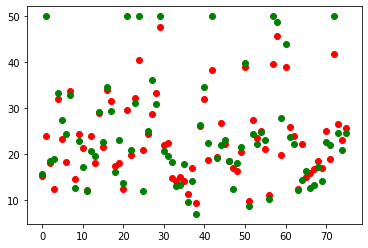

In [105]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)
print("Error: ", mean_squared_error(y_train, y_train_pred).mean())

y_pred = model.predict(X_test)
x = np.arange(0, len(X_test))
plt.scatter(x, y_pred, color='red') # Prediction
plt.scatter(x, y_test, color='green')

plt.show()

## Basically we are overfitting, let's add some regularization, let's say L1 regularization to maybe silence some variables